In [109]:
import pandas as pd

url = "https://raw.githubusercontent.com/UiT-sok-2013-h24/arbeidskrav2/5a3131437da15bf77fa821ca19fd4503b7e334cd/datasett1.csv"
data1 = pd.read_csv(url)

data1

,LOCATION,TIME,EXP,IMP,gdp,pop
0,ALB,2018,4072.439,6015.746,38690.695,NaN
1,ALB,2019,4179.780,6153.485,41121.413,NaN
2,ALB,2020,3015.233,4935.748,39826.280,NaN
3,ALB,2021,4417.689,6500.636,NaN,NaN
4,ARG,2018,75095.965,88781.390,1036307.018,44.494502
...,...,...,...,...,...,...
285,ZAF,2018,98794.245,101252.281,823603.406,57.673251
286,ZAF,2019,95521.282,101812.365,840317.205,58.532857
287,ZAF,2020,84089.427,83916.902,796453.237,59.352940
288,ZAF,2021,91732.800,91955.976,870861.683,59.964917


Datasettet inneholder informasjon om en rekke lands import og eksport (IMP og EXP), så vel som deres totale BNP (gdp) og befolkning (pop). 

Trade Openness er gitt av følgende formel:

$$ Degree \; of \; openness = \dfrac{X + M}{GDP} \;

,der \; X \; = \; eskport \;  og \;  I \; =  \;import $$

1. Kalkuler "openness" til alle land i datasettet. Rapporter åpenheten til Norge, og forklare hva nummeret betyr. Har Norge sette en endring i trade openness i perioden datasettet omhandler (2018-2021).

In [110]:
data1['Openness'] = (data1['EXP'] + data1['IMP']) / data1['gdp']  * 100
data1['TIME'] = data1['TIME'].astype(int)
data1

,LOCATION,TIME,EXP,IMP,gdp,pop,Openness
0,ALB,2018,4072.439,6015.746,38690.695,NaN,26.073931
1,ALB,2019,4179.780,6153.485,41121.413,NaN,25.128672
2,ALB,2020,3015.233,4935.748,39826.280,NaN,19.964157
3,ALB,2021,4417.689,6500.636,NaN,NaN,NaN
4,ARG,2018,75095.965,88781.390,1036307.018,44.494502,15.813591
...,...,...,...,...,...,...,...
285,ZAF,2018,98794.245,101252.281,823603.406,57.673251,24.289181
286,ZAF,2019,95521.282,101812.365,840317.205,58.532857,23.483233
287,ZAF,2020,84089.427,83916.902,796453.237,59.352940,21.094312
288,ZAF,2021,91732.800,91955.976,870861.683,59.964917,21.092761


In [130]:
unique_countries = data1['LOCATION'].unique()

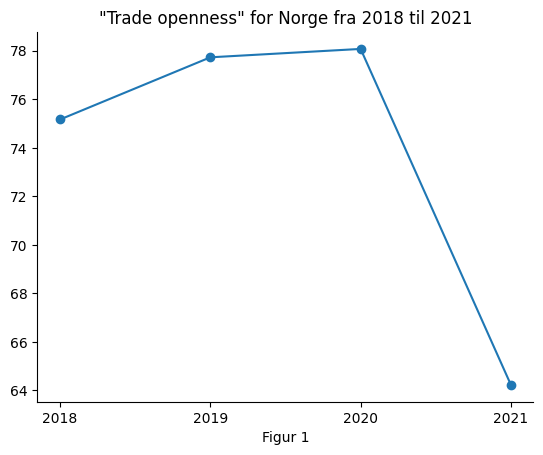

In [131]:
import pandas as pd 
import matplotlib.pyplot as plt 

unique_countries = data1['LOCATION'].unique()
norge_data = data1[(data1['LOCATION'] == 'NOR') & (data1['TIME'].between(2018, 2021))]

fig, ax = plt.subplots()
ax.plot(norge_data['TIME'],norge_data['Openness'],marker = 'o')

ax.set_title('"Trade openness" for Norge fra 2018 til 2021')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1')
ax.set_xticks(norge_data['TIME'].unique());

Trade Openness er gitt av følgende formel:

$$ Degree \; of \; openness = \dfrac{X + M}{GDP} \;

,der \; X \; = \; eskport \;  og \;  I \; =  \;import $$


Degree og openness eller graden av åpenhet måler landets økonomiske forbindelser med andre land. Slike forbindelser består av utveksling av varer og tjenester, eller i utveksling av innsatsfaktorer. 

I Norge økte graden av åpenhet fra 2019 til 2020, i 2021 var det en betydelig nedgang til nivåer som ligger betraktelig under nivået fra 2018. 

In [132]:
import seaborn as sns
data_for_2020 = data1[data1['TIME'] == 2020]

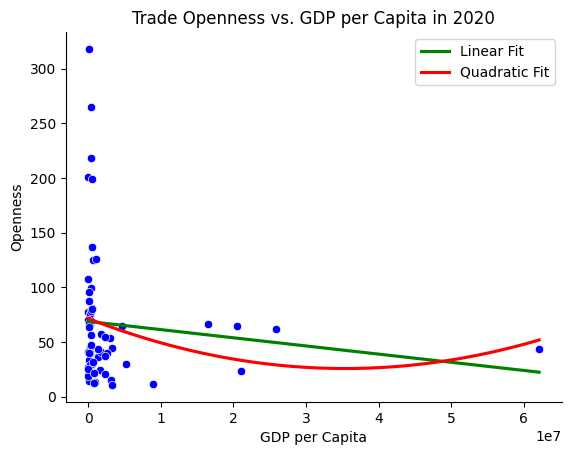

In [134]:
fig, ax = plt.subplots()

# Plotter først datapunktene
sns.scatterplot(x='gdp', y='Openness', data=data_for_2020, ax=ax, color='blue')

sns.regplot(x='gdp', y='Openness', data=data_for_2020, ci=None, order=1, ax=ax, label='Linear Fit', scatter=False, line_kws={'color': 'green'})
sns.regplot(x='gdp', y='Openness', data=data_for_2020, ci=None, order=2, ax=ax, label='Quadratic Fit', scatter=False, line_kws={'color': 'red'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Trade Openness vs. GDP per Capita in 2020')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Openness')
ax.legend()

plt.show()

In [ ]:
import numpy as np

data_for_2020['log_gdp'] = np.log(data_for_2020['gdp'])
data_for_2020

C:\Users\gusta\AppData\Local\Temp\ipykernel_4424\336952549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_2020['log_gdp'] = np.log(data_for_2020['gdp'])


,LOCATION,TIME,EXP,IMP,gdp,pop,Openness,log_gdp
2,ALB,2020,3015.233,4935.748,3.982628e+04,NaN,19.964157,10.592282
6,ARG,2020,67820.783,58856.734,9.421708e+05,45.376763,13.445281,13.755942
11,AUS,2020,246817.672,272170.872,1.430866e+06,25.655289,36.270929,14.173791
15,AUT,2020,214118.691,200921.412,5.105680e+05,8.916845,81.289876,13.143279
20,BEL,2020,396046.174,391996.674,6.296608e+05,11.506938,125.153555,13.352937
...,...,...,...,...,...,...,...,...
268,SVN,2020,39785.315,35717.764,8.597404e+04,2.100126,87.820785,11.361801
273,SWE,2020,246213.182,219978.069,5.812479e+05,10.353444,80.205230,13.272933
278,TUR,2020,227452.759,248641.134,2.332604e+06,83.384688,20.410407,14.662496
283,USA,2020,2128424.131,2843437.698,2.106047e+07,331.511512,23.607550,16.862909


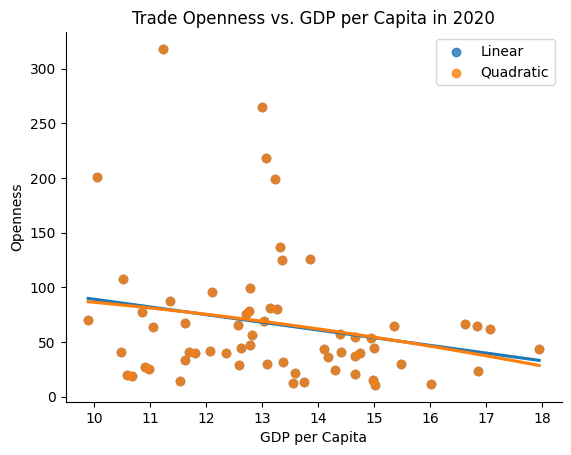

In [127]:
fig, ax = plt.subplots()

sns.regplot(x='log_gdp', y='Openness', data=data_for_2020, ci=None, label='Linear', order=1, ax=ax)
sns.regplot(x='log_gdp', y='Openness', data=data_for_2020, ci=None, label='Quadratic', order=2, ax=ax)

# Fjern topp og høyre linjer
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tilleggsinnstillinger for plot
ax.set_title('Trade Openness vs. GDP per Capita in 2020')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Openness')
ax.legend()

plt.show()